#                   Machine Learning Project 


Title : Heart Disease Prediction </br>
Author : Shayna Nicholas Tuscano</br>
Date : 05/01/2024

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# check for duplicate values
df.duplicated().sum()

23899

In [8]:
# Number of duplicate records : 023899

In [9]:
#Remove Duplicates
df = df.drop_duplicates()


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.103216,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.325627,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.304241,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.724623,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


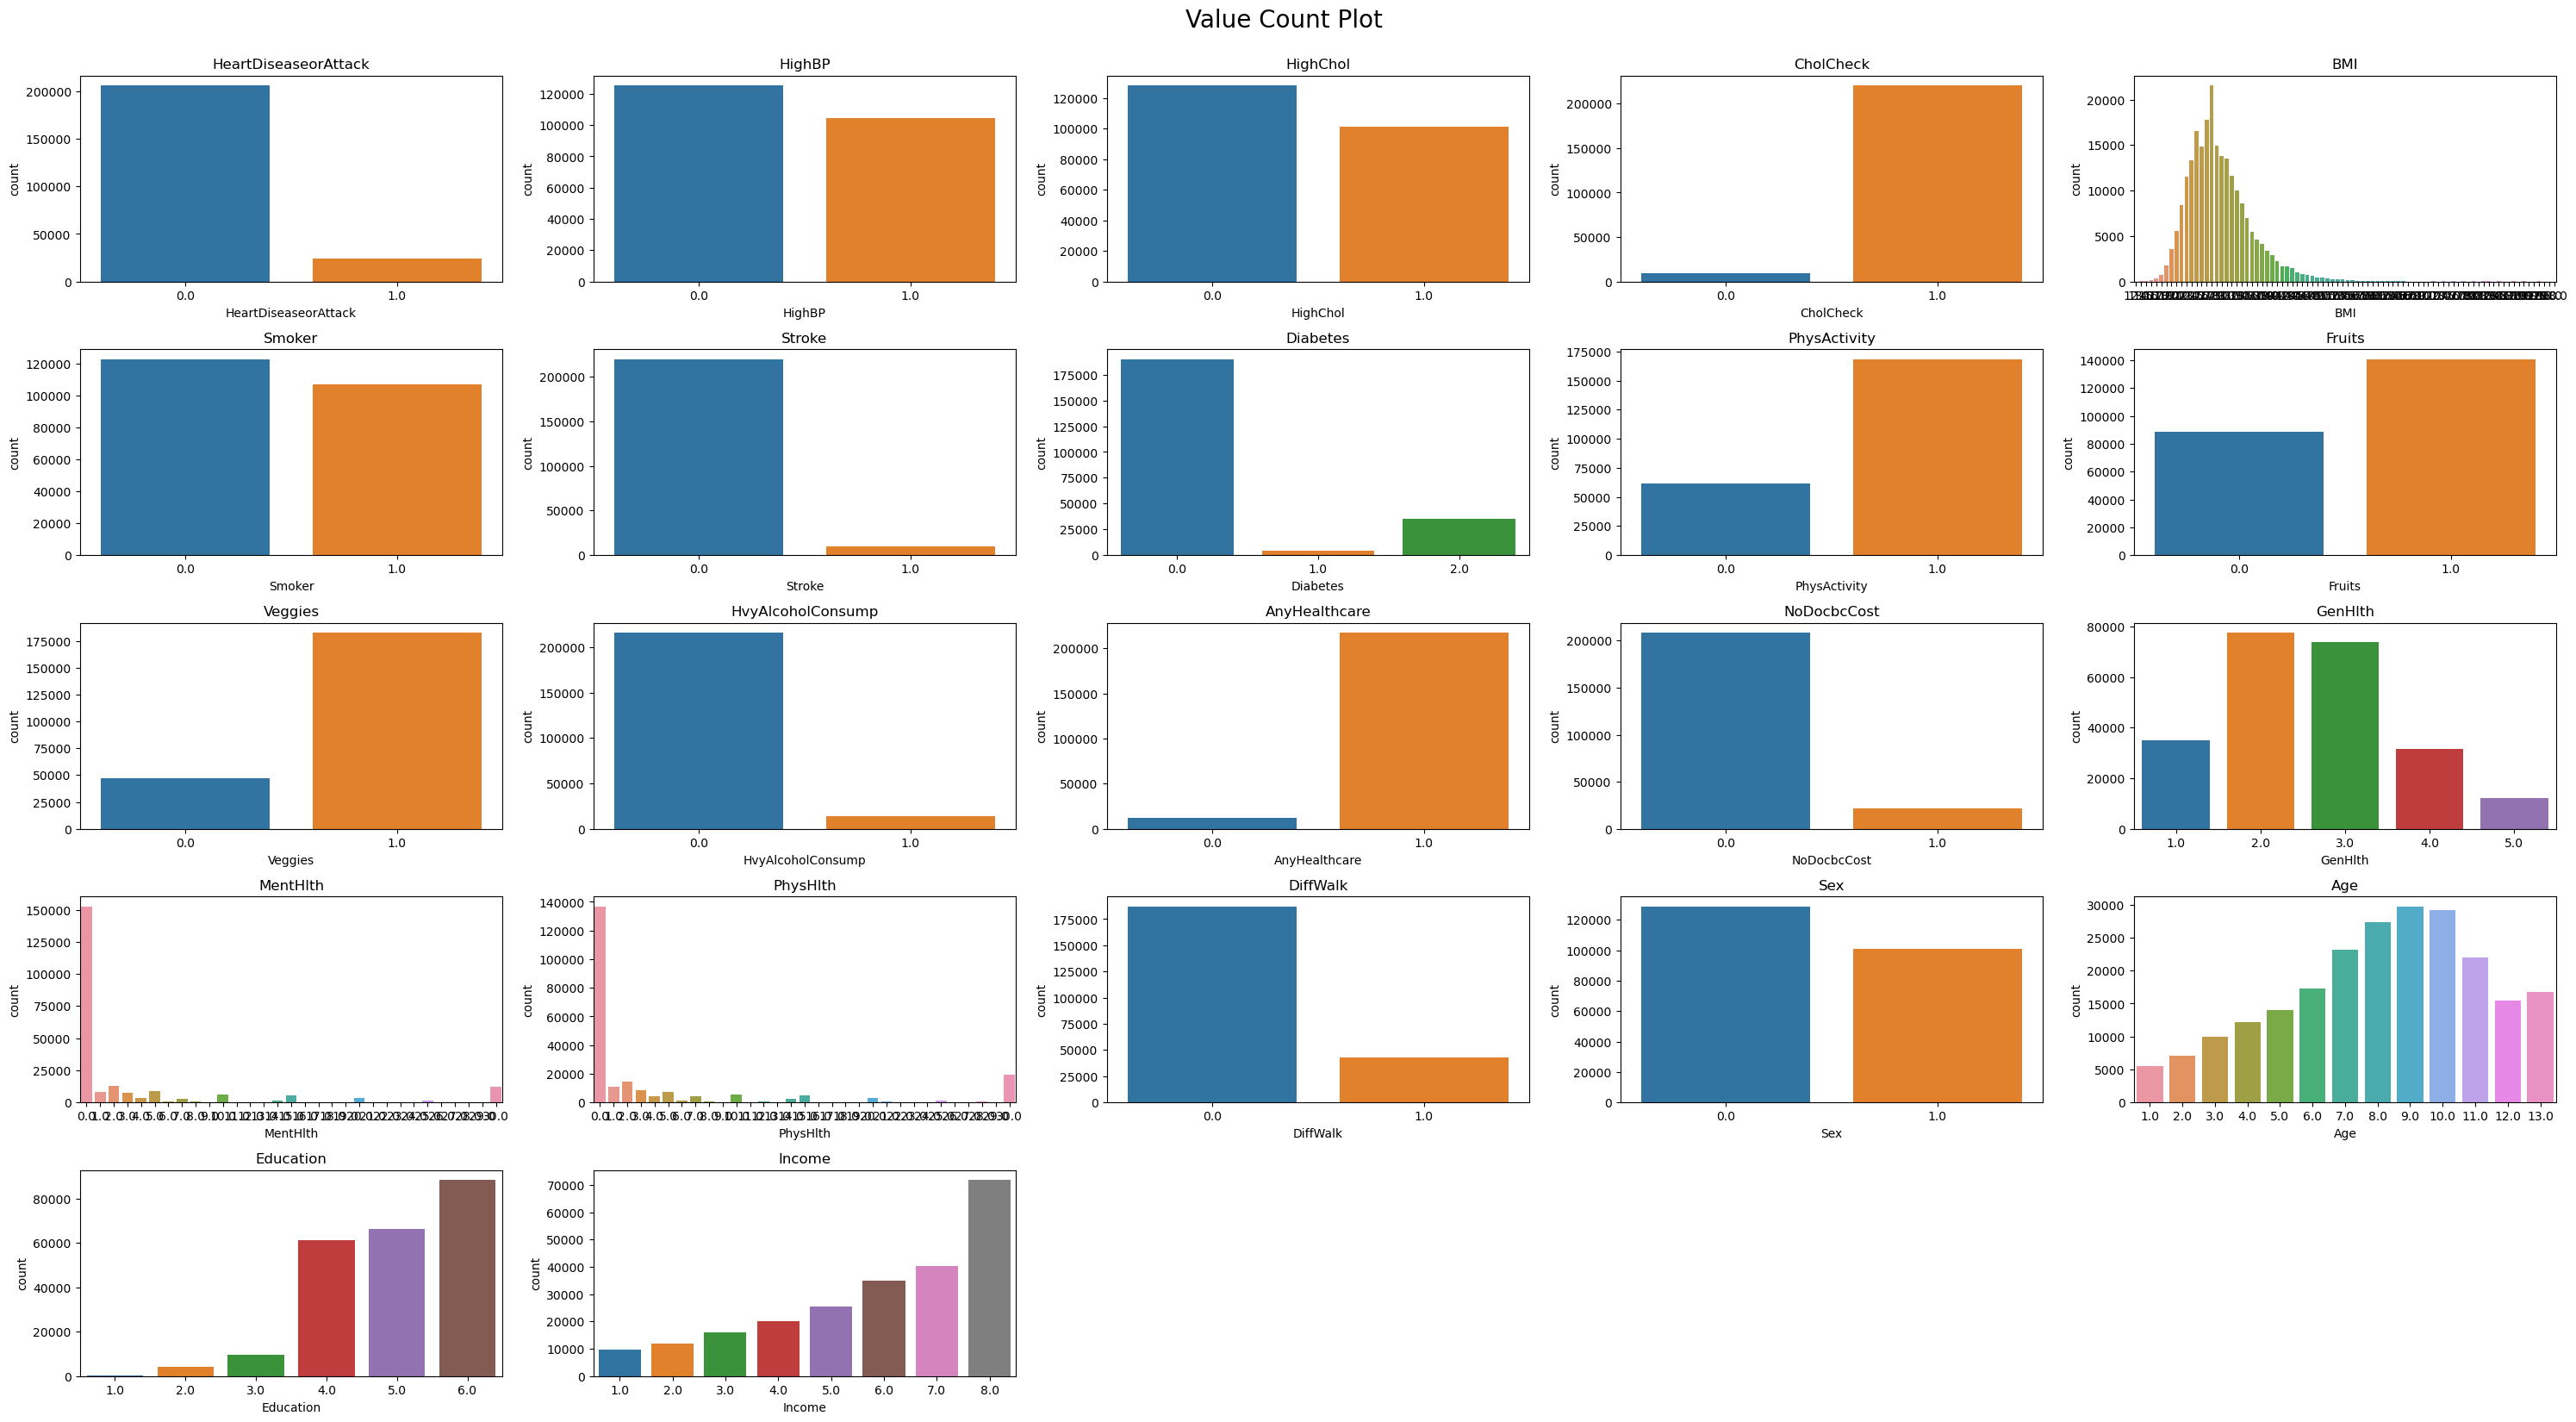

In [13]:
# Countplot on each feature to differentiate  binary categorical and numerical features
plt.figure(figsize=(30,70))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Value Count Plot ", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

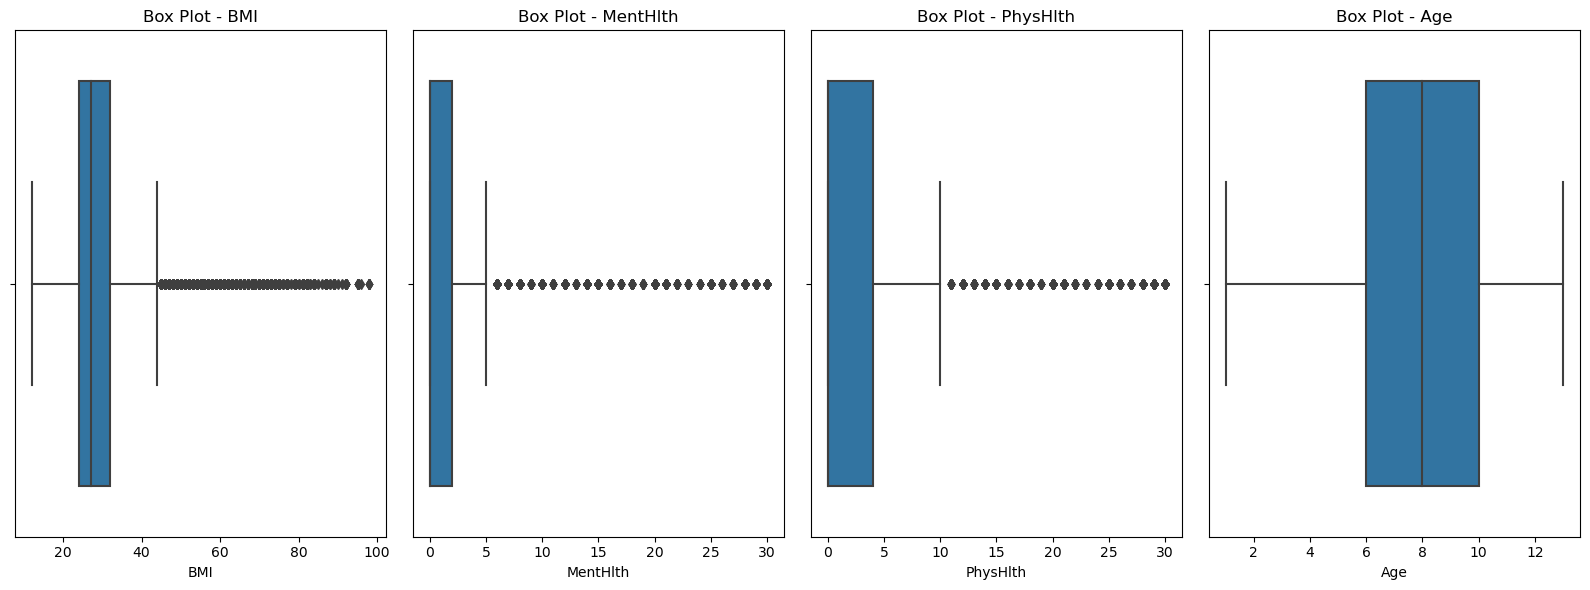

In [12]:
#check for outliers in numerical_features
numerical_features = df[['BMI','MentHlth', 'PhysHlth', 'Age']]
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features.columns), figsize=(16, 6))
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(x=numerical_features[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

<Axes: >

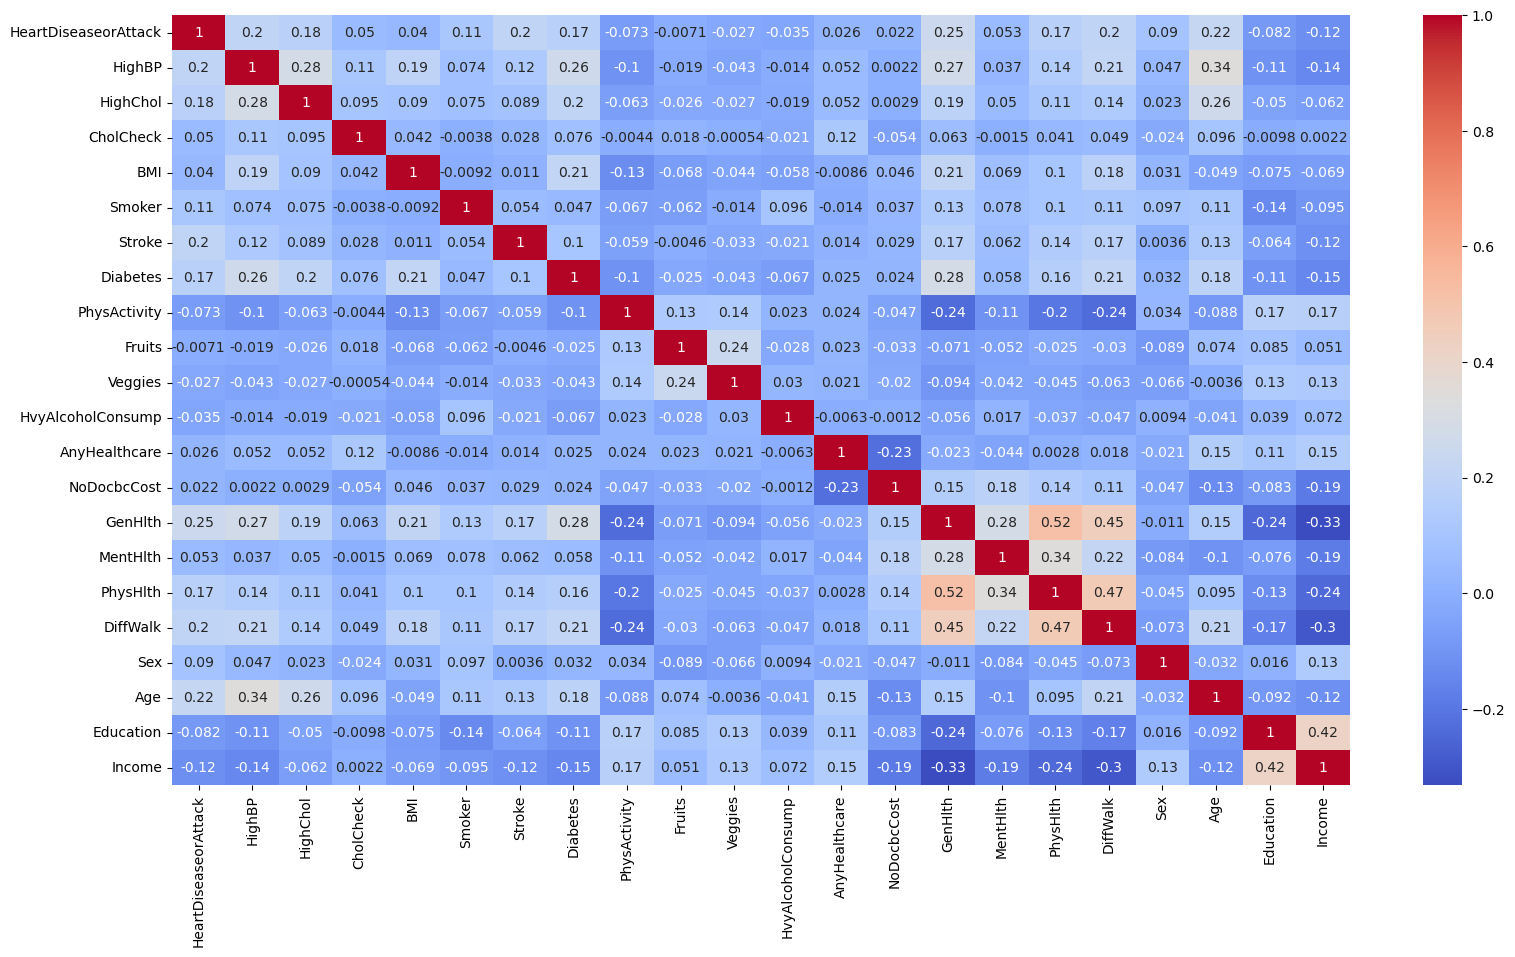

In [14]:
plt.figure(figsize = (19,10))

sns.heatmap(df.corr(), cmap="coolwarm",
            annot=True)

In [15]:
# find correlation of features with respect to Heart Attack Risk(label)
correlation_matrix = df.corr()
correlation = correlation_matrix['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')
correlation

HighBP               0.201271
HighChol             0.176279
CholCheck            0.049995
BMI                  0.039926
Smoker               0.105154
Stroke               0.198863
Diabetes             0.170816
PhysActivity        -0.073267
Fruits              -0.007128
Veggies             -0.027330
HvyAlcoholConsump   -0.035453
AnyHealthcare        0.025899
NoDocbcCost          0.022076
GenHlth              0.246411
MentHlth             0.052756
PhysHlth             0.170473
DiffWalk             0.202779
Sex                  0.089717
Age                  0.223626
Education           -0.082466
Income              -0.122908
Name: HeartDiseaseorAttack, dtype: float64

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'Smoker',
 'Stroke',
 'Diabetes',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Income']

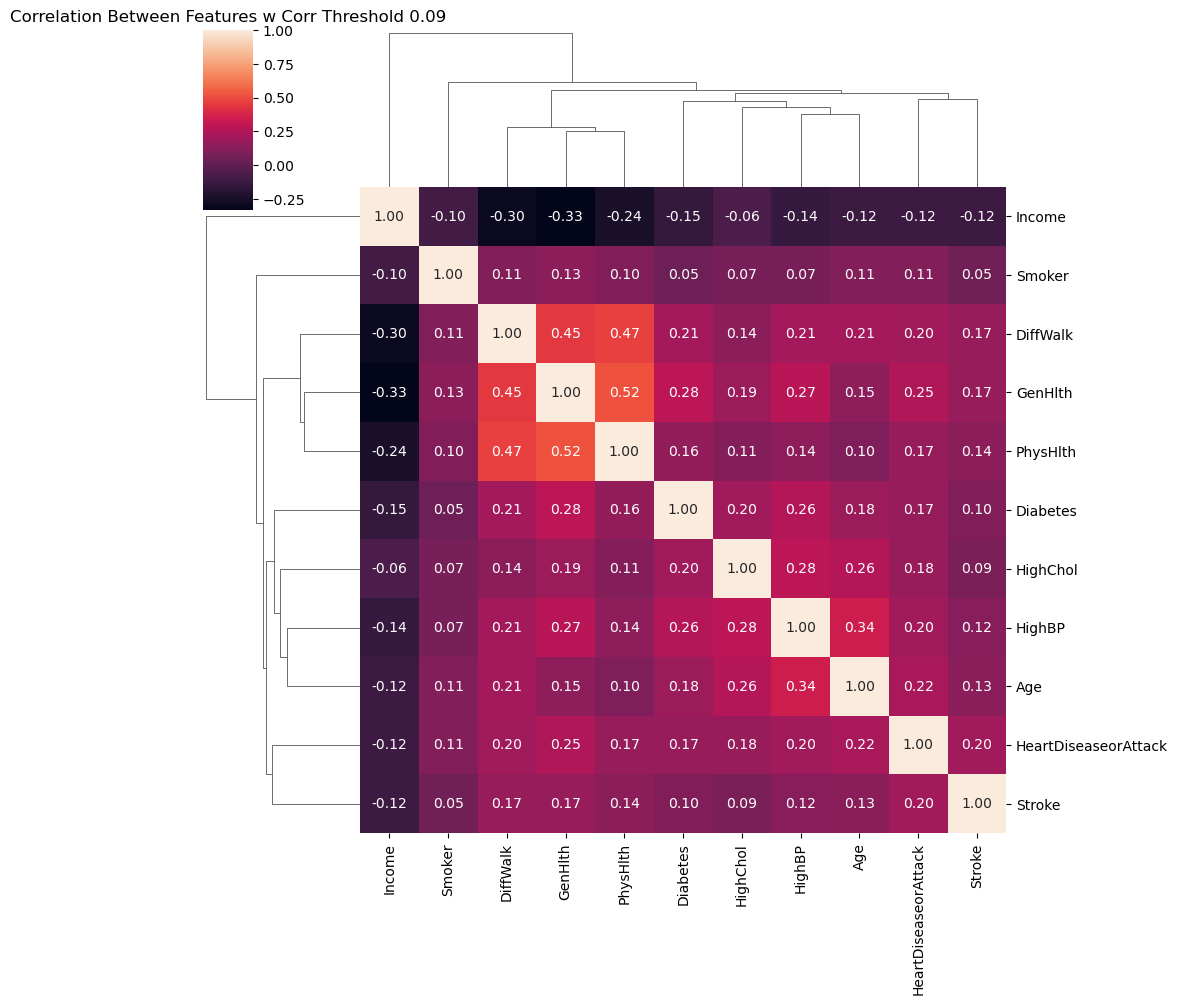

In [16]:

corr_matrix = df.corr()

# Set the correlation threshold
threshold = 0.09  # Adjust this threshold as needed
filtre = np.abs(corr_matrix["HeartDiseaseorAttack"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.09")
corr_features

In [17]:
# Removing the unwanted columns
df_new = df[corr_features]
df_new

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,Income
0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,15.0,1.0,9.0,3.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,5.0,30.0,1.0,9.0,8.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,7.0
253676,0.0,1.0,1.0,0.0,0.0,2.0,4.0,0.0,1.0,11.0,4.0
253677,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
253678,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,1.0


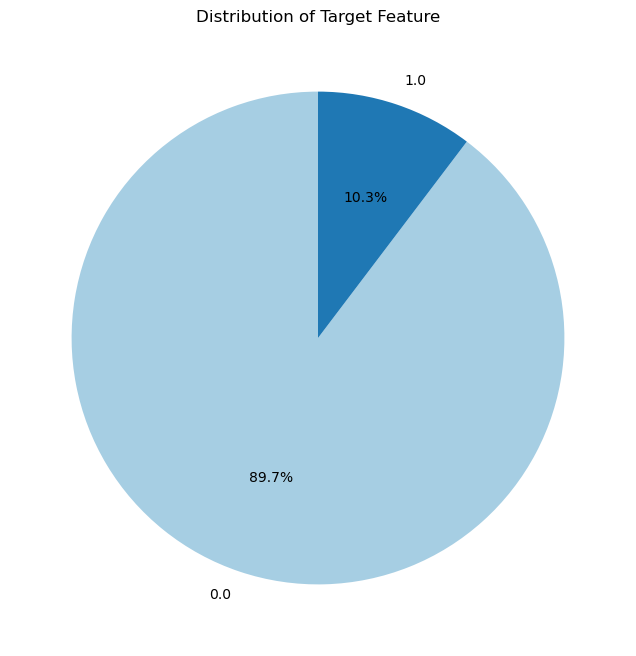

In [18]:
target_counts = df['HeartDiseaseorAttack'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Target Feature')
plt.show()

In [19]:
#target column
df.HeartDiseaseorAttack.value_counts()

0.0    206064
1.0     23717
Name: HeartDiseaseorAttack, dtype: int64

In [20]:
#Seperating Features and labels
X = df_new.drop('HeartDiseaseorAttack',axis = 1)
y = df_new.iloc[:,[0]] 

In [21]:
y=y.values.ravel()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#spliting the data into Main dataset (80%) and Test data (20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 20 )

In [24]:
! pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()

In [27]:
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)

# Model Training

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [30]:
k = 10

In [31]:
kfold = KFold(n_splits=k)

In [32]:
DT = DecisionTreeClassifier()
scores1 = cross_val_score(DT,X_train_SMOTE,y_train_SMOTE,cv=kfold)
print(scores1)
print("Average Accuracy : ",scores1.mean())

[0.82614498 0.82969366 0.8311192  0.82799515 0.83030027 0.87151956
 0.89805575 0.8989657  0.8972368  0.90048227]
Average Accuracy :  0.8611513337595202


In [33]:
LR =LogisticRegression()
scores2 = cross_val_score(LR,X_train_SMOTE,y_train_SMOTE,cv=kfold)
print(scores2)
print("Average Accuracy : ",scores2.mean())

[0.69945405 0.70524719 0.69969669 0.7        0.70333637 0.75210798
 0.72525706 0.72531772 0.72895751 0.72844187]
Average Accuracy :  0.7167816438403322


In [34]:
RF = RandomForestClassifier()
scores3 = cross_val_score(RF,X_train_SMOTE,y_train_SMOTE,cv=kfold)
print(scores3)
print("Average Accuracy : ",scores3.mean())

[0.83524416 0.83451623 0.83760995 0.83488019 0.837064   0.87831362
 0.90933908 0.90976372 0.90861112 0.91158361]
Average Accuracy :  0.8696925668714647


In [35]:
from sklearn.naive_bayes import GaussianNB


In [36]:
NB = GaussianNB()
scores4 = cross_val_score(NB,X_train_SMOTE,y_train_SMOTE,cv=kfold)
print(scores4)
print("Average Accuracy : ",scores4.mean())

[0.75705187 0.76163179 0.75908402 0.75680922 0.76044889 0.7200182
 0.63720465 0.63250326 0.63750796 0.63756863]
Average Accuracy :  0.705982847390035


In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
KN = KNeighborsClassifier()

In [39]:
scores5 = cross_val_score(KN,X_train_SMOTE,y_train_SMOTE,cv=kfold)
print(scores5)
print("Average Accuracy : ",scores5.mean())

[0.84352442 0.83958144 0.83782226 0.83791325 0.84388838 0.78325751
 0.67869817 0.67569535 0.67411811 0.67596833]
Average Accuracy :  0.769046722717519


Text(0.5, 1.0, 'Evaluation of model based on appropriate performance metric')

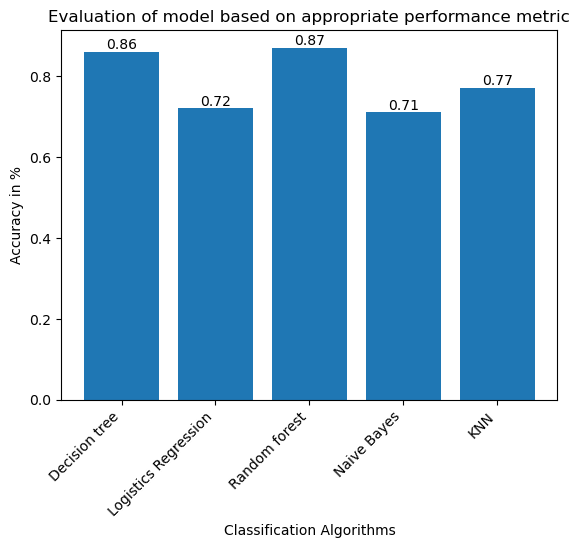

In [40]:
values=[scores1.mean().round(2),scores2.mean().round(2),scores3.mean().round(2),scores4.mean().round(2),scores5.mean().round(2)]
names = ['Decision tree',"Logistics Regression",'Random forest',"Naive Bayes",'KNN']
barplot = plt.bar(names, values)
plt.bar_label(barplot,values)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy in %')
plt.xticks(rotation=45, ha='right')
plt.title('Evaluation of model based on appropriate performance metric')

In [46]:
#we select Decision tree and Random forest and tune the hyper-parameter using grid search cv


In [47]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [48]:
param_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid1)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
rf_grid = GridSearchCV(estimator = RF, 
                       param_grid = param_grid1, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [51]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   2.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   1.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120; total time=   2.8s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=100; total time=   2.6s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.6s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   1.8s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   3.5s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=100; total time=   3.3

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   1.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   2.6s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   1.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   3.3s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=100; total time=   3.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.7s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   2.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=120; total time=   3.9s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_es

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   1.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   2.6s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   1.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   3.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=100; total time=   3.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.7s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   1.9s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=120; total time=   3.9s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_es

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   1.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   2.6s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   2.4s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   1.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   3.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=100; total time=   3.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.7s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   2.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=120; total time=   4.0s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_es

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   1.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   2.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   1.5s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   3.1s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=100; total time=   2.9s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=20; total time=   0.7s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   2.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=120; total time=   3.9s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_es

[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   2.6s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   7.5s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=120; total time=  15.0s
[CV] END max_depth=None, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  16.7s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=20; total time=   3.9s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=60; total time=  11.7s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=120; total time=  21.6s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=20; total time=   2.6s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=60; total time=   7.6s
[CV] END max_depth=None, max_features=1.0, max_samples=0.5, n_estimators=120; total time=  14.9s
[CV] END max_depth=None, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [52]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 60}

In [53]:
RF_Accuracy=rf_grid.best_score_

In [54]:
param_grid2 = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}


In [55]:
dt_grid = GridSearchCV(estimator = DT, 
                       param_grid = param_grid2, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [56]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [57]:
dt_grid.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [58]:
DT_Accuracy=dt_grid.best_score_

In [59]:
DT_Accuracy

0.8982994576778889

In [60]:
#performance metrics 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [61]:
y_predict_DT = dt_grid.predict(X_test)

y_predict_RF = rf_grid.predict(X_test)



In [62]:
dt_performance =classification_report(y_test,y_predict_DT)
print(dt_performance) #Decision Tree performance

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95     41216
         1.0       0.57      0.08      0.14      4741

    accuracy                           0.90     45957
   macro avg       0.74      0.54      0.54     45957
weighted avg       0.87      0.90      0.86     45957



In [63]:
DT_cm =confusion_matrix(y_test,y_predict_DT,labels=[0,1])
tn, fp, fn, tp = DT_cm.ravel()
print(tn, fp, fn, tp )

40928 288 4359 382


Text(0.5, 1.0, 'Confusion matrix for Decision')

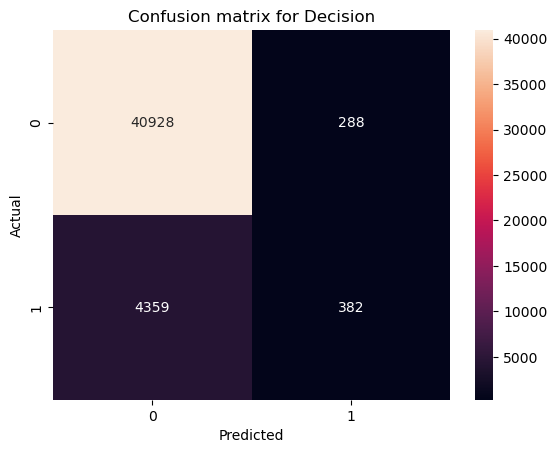

In [64]:
sns.heatmap(DT_cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix for Decision')

In [65]:
rf_performance =classification_report(y_test,y_predict_RF)
print(rf_performance) #Random Forest performance

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95     41216
         1.0       0.58      0.07      0.12      4741

    accuracy                           0.90     45957
   macro avg       0.74      0.53      0.53     45957
weighted avg       0.87      0.90      0.86     45957



In [66]:
RF_cm =confusion_matrix(y_test,y_predict_RF,labels=[0,1])
tn, fp, fn, tp = RF_cm.ravel()
print(tn, fp, fn, tp )

40992 224 4426 315


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

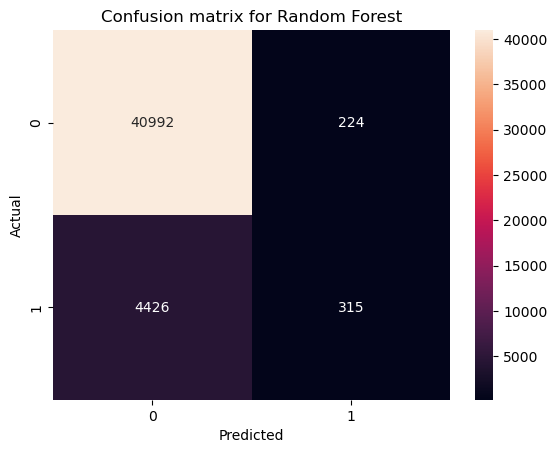

[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=100; total time=  19.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10; total tim

[CV] END max_depth=None, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  16.7s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=20; total time=   3.9s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=60; total time=  11.7s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=120; total time=  21.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] E

[CV] END max_depth=None, max_features=1.0, max_samples=0.75, n_estimators=100; total time=  16.6s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=20; total time=   3.9s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=60; total time=  11.6s
[CV] END max_depth=None, max_features=1.0, max_samples=1.0, n_estimators=120; total time=  21.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total tim

In [67]:
sns.heatmap(RF_cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix for Random Forest')